In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
building_data = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')

In [3]:
pd.options.display.max_columns = None
display(building_data)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

In [4]:
building_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

In [5]:
#Notavailable needs to be replaced by nan values
building_data = building_data.replace({'Not Available': np.nan})


In [6]:
drop_index = building_data[(building_data['ENERGY STAR Score'].isnull() == True) ].index
building_data = building_data.drop(drop_index)

In [7]:
building_data.nunique()

##Inference - Order ID, Property ID are unique and has no pattern
## DOF Benchmarking Submission Status has one unique value only
## warer required has 2 unique value
## Borough has 5 unique values
## data type correction is required for numerical columns


Order                                                         9642
Property Id                                                   9642
Property Name                                                 9638
Parent Property Id                                              82
Parent Property Name                                            82
BBL - 10 digits                                               9567
NYC Borough, Block and Lot (BBL) self-reported                9567
NYC Building Identification Number (BIN)                      9467
Address 1 (self-reported)                                     9584
Address 2                                                      125
Postal Code                                                    266
Street Number                                                 3772
Street Name                                                   1872
Borough                                                          5
DOF Gross Floor Area                                          

In [8]:
(building_data['ENERGY STAR Score'].isnull()).sum()

0

In [9]:
col_nam = building_data.columns


In [10]:
#dropping columns with no pattern values

new_buildingdata = building_data.drop(['Order','Property Id',  #dropping Order and property ID as they have unique values 
 'Property Name', #           # Depends on property id which is already dropped 
 'Parent Property Id',        # Depends on property id which is already dropped 
 'Parent Property Name',      # Depends on property id which is already dropped 
 'Address 1 (self-reported)',  # Depends on property id which is already dropped 
 'Address 2',
 'Postal Code', # shall be catered with borough category
 'Street Number',  #Depends on propert id which is already dropped 
 'Street Name',    # Depends on propert id which is already dropped 
 'NTA'], axis =1)  # Depends on Adress


In [11]:
# dropping BBL values no value, as we cannot assign random BBL without tax block
drop_index = new_buildingdata[(building_data['BBL - 10 digits'].isnull() == True) ].index
new_buildingdata = new_buildingdata.drop(drop_index)

In [12]:
null_percentage = (((new_buildingdata.isnull().sum())/len(new_buildingdata))*100)
null_percentage

BBL - 10 digits                                                0.000000
NYC Borough, Block and Lot (BBL) self-reported                 0.000000
NYC Building Identification Number (BIN)                       1.348548
Borough                                                        0.632780
DOF Gross Floor Area                                           0.632780
Primary Property Type - Self Selected                          0.000000
List of All Property Use Types at Property                     0.000000
Largest Property Use Type                                      0.000000
Largest Property Use Type - Gross Floor Area (ft²)             0.000000
2nd Largest Property Use Type                                 75.321577
2nd Largest Property Use - Gross Floor Area (ft²)             75.321577
3rd Largest Property Use Type                                 91.970954
3rd Largest Property Use Type - Gross Floor Area (ft²)        91.970954
Year Built                                                     0

In [13]:
new_buildingdata['DOF Benchmarking Submission Status'].value_counts()

In Compliance    9614
Name: DOF Benchmarking Submission Status, dtype: int64

In [14]:
# dropping columns with more than 50% of nan values, Also droppinf DOF column as it has only one unique value

new_buildingdata = new_buildingdata.drop(['District Steam Use (kBtu)',                                    

'Diesel #2 Use (kBtu)',                                         

'Fuel Oil #5 & 6 Use (kBtu)',                                   

'Fuel Oil #4 Use (kBtu)',                                       

'Fuel Oil #2 Use (kBtu)',                                       

'Fuel Oil #1 Use (kBtu)',                                       

'3rd Largest Property Use Type - Gross Floor Area (ft²)',       

'3rd Largest Property Use Type',                                

'2nd Largest Property Use - Gross Floor Area (ft²)',            

'2nd Largest Property Use Type',

'DOF Benchmarking Submission Status'
                               
], axis =1)



In [15]:
new_buildingdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9640 entries, 1 to 11745
Data columns (total 38 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   BBL - 10 digits                                             9640 non-null   object 
 1   NYC Borough, Block and Lot (BBL) self-reported              9640 non-null   object 
 2   NYC Building Identification Number (BIN)                    9510 non-null   object 
 3   Borough                                                     9579 non-null   object 
 4   DOF Gross Floor Area                                        9579 non-null   float64
 5   Primary Property Type - Self Selected                       9640 non-null   object 
 6   List of All Property Use Types at Property                  9640 non-null   object 
 7   Largest Property Use Type                                   9640 non-null   object 
 8

In [16]:
numeric_col = [ 'ENERGY STAR Score' ,                  
'Largest Property Use Type - Gross Floor Area (ft²)',
'DOF Gross Floor Area',  
'Site EUI (kBtu/ft²)',
'Weather Normalized Site EUI (kBtu/ft²)',
'Weather Normalized Site Electricity Intensity (kWh/ft²)',
'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
'Weather Normalized Source EUI (kBtu/ft²)',
'Natural Gas Use (kBtu)',
'Weather Normalized Site Natural Gas Use (therms)',
'Electricity Use - Grid Purchase (kBtu)',
'Weather Normalized Site Electricity (kWh)',
'Total GHG Emissions (Metric Tons CO2e)',
'Direct GHG Emissions (Metric Tons CO2e)',
'Indirect GHG Emissions (Metric Tons CO2e)',               
'Source EUI (kBtu/ft²)',
              'Water Intensity (All Water Sources) (gal/ft²)',
              'Water Use (All Water Sources) (kgal)']   

for i in numeric_col:
    new_buildingdata[i] = new_buildingdata[i].astype(float)

In [17]:
new_buildingdata.isnull().sum()

BBL - 10 digits                                                  0
NYC Borough, Block and Lot (BBL) self-reported                   0
NYC Building Identification Number (BIN)                       130
Borough                                                         61
DOF Gross Floor Area                                            61
Primary Property Type - Self Selected                            0
List of All Property Use Types at Property                       0
Largest Property Use Type                                        0
Largest Property Use Type - Gross Floor Area (ft²)               0
Year Built                                                       0
Number of Buildings - Self-reported                              0
Occupancy                                                        0
Metered Areas (Energy)                                           4
Metered Areas  (Water)                                        3741
ENERGY STAR Score                                             

In [18]:
#missing borough values are replaced by bbl mapping BBL digit code


new_buildingdata['borough_code'] = list(map(lambda x : x[0],  new_buildingdata['BBL - 10 digits']))
new_buildingdata['boroughname'] = new_buildingdata['borough_code']
new_buildingdata['boroughname'] = new_buildingdata['boroughname'].replace({'1': 'Manhattan', '2' : 'Bronx', '3' : 'Brooklyn', '4': 'Queens', '5' : 'Staten Island' })

    

In [19]:

new_buildingdata['Borough'] = new_buildingdata['Borough'].fillna(new_buildingdata['boroughname'])
#new_buildingdata.drop(['boroughname', 'borough_code'])

In [20]:
new_buildingdata = new_buildingdata.drop(['boroughname', 'borough_code'], axis =1)

In [21]:
(new_buildingdata['Borough'].value_counts()/len(new_buildingdata))*100

Manhattan        42.385892
Brooklyn         20.622407
Queens           18.246888
Bronx            17.406639
Staten Island     1.317427
​                 0.020747
Name: Borough, dtype: float64

In [22]:
# Dividing data on basis Borough

Manhattan_data = new_buildingdata.loc[new_buildingdata['Borough'] == 'Manhattan']
Bronx_data = new_buildingdata.loc[new_buildingdata['Borough'] == 'Bronx']
Brooklyn_data = new_buildingdata.loc[new_buildingdata['Borough'] == 'Brooklyn']
Queens_data = new_buildingdata.loc[new_buildingdata['Borough'] == 'Queens']
Staten_data = new_buildingdata.loc[new_buildingdata['Borough'] == 'Staten Island']


In [23]:
((Manhattan_data.isnull().sum())/(len(Manhattan_data)))*100

BBL - 10 digits                                                0.000000
NYC Borough, Block and Lot (BBL) self-reported                 0.000000
NYC Building Identification Number (BIN)                       1.223691
Borough                                                        0.000000
DOF Gross Floor Area                                           0.709741
Primary Property Type - Self Selected                          0.000000
List of All Property Use Types at Property                     0.000000
Largest Property Use Type                                      0.000000
Largest Property Use Type - Gross Floor Area (ft²)             0.000000
Year Built                                                     0.000000
Number of Buildings - Self-reported                            0.000000
Occupancy                                                      0.000000
Metered Areas (Energy)                                         0.024474
Metered Areas  (Water)                                        35

In [24]:
# # columns with less than 2% missing values filled with bfill method

col1 = ['DOF Gross Floor Area','Largest Property Use Type','Largest Property Use Type - Gross Floor Area (ft²)','Largest Property Use Type - Gross Floor Area (ft²)',
       'Metered Areas (Energy)','Electricity Use - Grid Purchase (kBtu)','Electricity Use - Grid Purchase (kBtu)',
        'Total GHG Emissions (Metric Tons CO2e)' , 'Direct GHG Emissions (Metric Tons CO2e)' ,'Indirect GHG Emissions (Metric Tons CO2e)' ,
       'Source EUI (kBtu/ft²)', 'Council District', 'Latitude', 'Longitude', 'Community Board', 'Census Tract', 'NYC Building Identification Number (BIN)', 'Water Required?']

for i in col1:
     Manhattan_data[i] = Manhattan_data[i].fillna(method = 'bfill')

/var/folders/s6/nl9myj9d5_123z_8p1d0f5hh0000gn/T/ipykernel_7851/1212885684.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Manhattan_data[i] = Manhattan_data[i].fillna(method = 'bfill')


In [25]:
# columns with less than 20% missing values filled with median method

col1 = ['Weather Normalized Site Electricity (kWh)', 'Weather Normalized Site Natural Gas Use (therms)', 'Natural Gas Use (kBtu)',
         'Weather Normalized Source EUI (kBtu/ft²)', 'Weather Normalized Site Natural Gas Intensity (therms/ft²)', 'Weather Normalized Site Electricity Intensity (kWh/ft²)',
         'Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)'
        ]

for i in col1:
    Manhattan_data[i] = Manhattan_data[i].fillna(Manhattan_data[i].median())

/var/folders/s6/nl9myj9d5_123z_8p1d0f5hh0000gn/T/ipykernel_7851/237518998.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Manhattan_data[i] = Manhattan_data[i].fillna(Manhattan_data[i].median())


In [26]:
Manhattan_data['Metered Areas  (Water)']= Manhattan_data['Metered Areas  (Water)'].fillna(Manhattan_data['Metered Areas  (Water)'].mode()[0])
Manhattan_data['Water Use (All Water Sources) (kgal)']= Manhattan_data['Water Use (All Water Sources) (kgal)'].fillna(Manhattan_data['Water Use (All Water Sources) (kgal)'].mode()[0])
Manhattan_data['Water Intensity (All Water Sources) (gal/ft²)']= Manhattan_data['Water Intensity (All Water Sources) (gal/ft²)'].fillna(Manhattan_data['Water Intensity (All Water Sources) (gal/ft²)'].mode()[0])

/var/folders/s6/nl9myj9d5_123z_8p1d0f5hh0000gn/T/ipykernel_7851/3513429333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Manhattan_data['Metered Areas  (Water)']= Manhattan_data['Metered Areas  (Water)'].fillna(Manhattan_data['Metered Areas  (Water)'].mode()[0])
/var/folders/s6/nl9myj9d5_123z_8p1d0f5hh0000gn/T/ipykernel_7851/3513429333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Manhattan_data['Water Use (All Water Sources) (kgal)']= Manhattan_data['Water Use (All Water Sources) (kgal)'].filln

In [27]:
Manhattan_data.isnull().sum()

BBL - 10 digits                                               0
NYC Borough, Block and Lot (BBL) self-reported                0
NYC Building Identification Number (BIN)                      0
Borough                                                       0
DOF Gross Floor Area                                          0
Primary Property Type - Self Selected                         0
List of All Property Use Types at Property                    0
Largest Property Use Type                                     0
Largest Property Use Type - Gross Floor Area (ft²)            0
Year Built                                                    0
Number of Buildings - Self-reported                           0
Occupancy                                                     0
Metered Areas (Energy)                                        0
Metered Areas  (Water)                                        0
ENERGY STAR Score                                             0
Site EUI (kBtu/ft²)                     

In [28]:
# All missing values are handled , now explore the data distribution through plots
# Data encoding for categorical values

Manhattan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 1 to 5470
Data columns (total 38 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   BBL - 10 digits                                             4086 non-null   object 
 1   NYC Borough, Block and Lot (BBL) self-reported              4086 non-null   object 
 2   NYC Building Identification Number (BIN)                    4086 non-null   object 
 3   Borough                                                     4086 non-null   object 
 4   DOF Gross Floor Area                                        4086 non-null   float64
 5   Primary Property Type - Self Selected                       4086 non-null   object 
 6   List of All Property Use Types at Property                  4086 non-null   object 
 7   Largest Property Use Type                                   4086 non-null   object 
 8 

In [29]:
Manhattan_data = Manhattan_data.drop(['Borough'], axis =1)

In [30]:
Manhattan_data.head()

,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,Latitude,Longitude,Community Board,Council District,Census Tract
1,1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181.0,1969,12,100,Whole Building,Whole Building,55.0,229.8,228.8,24.8,2.4,401.1,9.330734e+08,9330734.4,332365924.0,96261312.1,55870.4,51016.4,4854.1,3889181,0.0,0.0,404.3,04/27/2017 11:23:27 AM,No,40.841402,-73.942568,12.0,10.0,251.0
5,1014800001,1-01480-0001,1084781; 1084780,2230742.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),2971874.0,1932,12,100,Whole Building,Whole Building,55.0,359.9,359.0,8.3,4.8,411.5,1.432251e+09,14322508.8,86335350.5,24550859.4,54429.8,77564.1,-23134.3,2971874,0.0,0.0,414.2,04/27/2017 11:23:27 AM,No,40.761395,-73.957726,8.0,5.0,116.0
18,1021800614;1021800628,1021800614;1021800628,1064475;1064476;1803806,179130.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,321464.0,1939,2,100,Whole Building,Whole Building,72.0,76.2,79.9,3.5,0.0,106.2,8.802000e+05,8906.3,3968641.7,1121931.8,1893.4,1525.1,368.3,321464,5915.6,18.4,103.3,05/01/2017 10:09:31 PM,Yes,40.857943,-73.934962,12.0,10.0,281.0
19,1021800614,1021800614,1064475,179130.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,204720.0,1939,1,100,Whole Building,Whole Building,67.0,75.7,79.0,4.0,0.0,109.1,5.534394e+05,5604.4,2886852.2,820016.2,1204.4,936.5,267.9,204720,0.0,0.0,106.6,05/01/2017 10:09:31 PM,Yes,40.857943,-73.934962,12.0,10.0,281.0
20,1021800628,1021800628,1064476;1803806,102150.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,116744.0,1939,1,100,Whole Building,Whole Building,80.0,77.1,82.7,2.6,0.0,102.8,3.267606e+05,3301.9,1081789.4,308074.6,689.0,588.6,100.4,116744,0.0,0.0,97.7,05/01/2017 10:09:31 PM,Yes,40.858256,-73.934734,12.0,10.0,281.0


In [31]:
(Manhattan_data['Primary Property Type - Self Selected'].value_counts()/len(Manhattan_data['Primary Property Type - Self Selected']))*100

Multifamily Housing                      66.372981
Office                                   23.959863
Hotel                                     4.552129
Residence Hall/Dormitory                  1.688693
K-12 School                               0.562898
Other                                     0.562898
Medical Office                            0.440529
Retail Store                              0.416055
Hospital (General Medical & Surgical)     0.391581
Financial Office                          0.342633
Non-Refrigerated Warehouse                0.293686
Senior Care Community                     0.146843
Mixed Use Property                        0.146843
Distribution Center                       0.048948
Worship Facility                          0.024474
College/University                        0.024474
Fitness Center/Health Club/Gym            0.024474
Name: Primary Property Type - Self Selected, dtype: float64

In [32]:
(Manhattan_data['Primary Property Type - Self Selected'].value_counts()/len(Manhattan_data['Primary Property Type - Self Selected']))*100

Multifamily Housing                      66.372981
Office                                   23.959863
Hotel                                     4.552129
Residence Hall/Dormitory                  1.688693
K-12 School                               0.562898
Other                                     0.562898
Medical Office                            0.440529
Retail Store                              0.416055
Hospital (General Medical & Surgical)     0.391581
Financial Office                          0.342633
Non-Refrigerated Warehouse                0.293686
Senior Care Community                     0.146843
Mixed Use Property                        0.146843
Distribution Center                       0.048948
Worship Facility                          0.024474
College/University                        0.024474
Fitness Center/Health Club/Gym            0.024474
Name: Primary Property Type - Self Selected, dtype: float64

In [33]:
Manhattan_data['MultiHousing'] = pd.get_dummies(Manhattan_data['Primary Property Type - Self Selected'])['Multifamily Housing'].astype('int')
Manhattan_data = Manhattan_data.drop(['Primary Property Type - Self Selected'],axis=1)
Manhattan_data.head()

,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),DOF Gross Floor Area,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,Latitude,Longitude,Community Board,Council District,Census Tract,MultiHousing
1,1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181.0,1969,12,100,Whole Building,Whole Building,55.0,229.8,228.8,24.8,2.4,401.1,9.330734e+08,9330734.4,332365924.0,96261312.1,55870.4,51016.4,4854.1,3889181,0.0,0.0,404.3,04/27/2017 11:23:27 AM,No,40.841402,-73.942568,12.0,10.0,251.0,0
5,1014800001,1-01480-0001,1084781; 1084780,2230742.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),2971874.0,1932,12,100,Whole Building,Whole Building,55.0,359.9,359.0,8.3,4.8,411.5,1.432251e+09,14322508.8,86335350.5,24550859.4,54429.8,77564.1,-23134.3,2971874,0.0,0.0,414.2,04/27/2017 11:23:27 AM,No,40.761395,-73.957726,8.0,5.0,116.0,0
18,1021800614;1021800628,1021800614;1021800628,1064475;1064476;1803806,179130.0,Multifamily Housing,Multifamily Housing,321464.0,1939,2,100,Whole Building,Whole Building,72.0,76.2,79.9,3.5,0.0,106.2,8.802000e+05,8906.3,3968641.7,1121931.8,1893.4,1525.1,368.3,321464,5915.6,18.4,103.3,05/01/2017 10:09:31 PM,Yes,40.857943,-73.934962,12.0,10.0,281.0,1
19,1021800614,1021800614,1064475,179130.0,Multifamily Housing,Multifamily Housing,204720.0,1939,1,100,Whole Building,Whole Building,67.0,75.7,79.0,4.0,0.0,109.1,5.534394e+05,5604.4,2886852.2,820016.2,1204.4,936.5,267.9,204720,0.0,0.0,106.6,05/01/2017 10:09:31 PM,Yes,40.857943,-73.934962,12.0,10.0,281.0,1
20,1021800628,1021800628,1064476;1803806,102150.0,Multifamily Housing,Multifamily Housing,116744.0,1939,1,100,Whole Building,Whole Building,80.0,77.1,82.7,2.6,0.0,102.8,3.267606e+05,3301.9,1081789.4,308074.6,689.0,588.6,100.4,116744,0.0,0.0,97.7,05/01/2017 10:09:31 PM,Yes,40.858256,-73.934734,12.0,10.0,281.0,1


In [34]:
#dropped because 99 % of the data has same value and has no specific pattern
Manhattan_data['LargestPropertyType_MultiHousing'] = pd.get_dummies(Manhattan_data['Largest Property Use Type'])['Multifamily Housing'].astype('int')
Manhattan_data = Manhattan_data.drop(['Largest Property Use Type'],axis=1)


In [35]:
Manhattan_data['Metered Areas  (Water)'].value_counts(normalize = True)
Manhattan_data['Metered Areas (Energy)'].value_counts(normalize = True) # 99 % of data has whole building therefore dropping

Whole Building           0.997553
Another configuration    0.002447
Name: Metered Areas (Energy), dtype: float64

In [36]:
Manhattan_data = Manhattan_data.drop(['Metered Areas  (Water)'],axis=1)
Manhattan_data = Manhattan_data.drop(['Metered Areas (Energy)'],axis=1)
Manhattan_data.head()

,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),DOF Gross Floor Area,List of All Property Use Types at Property,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,Latitude,Longitude,Community Board,Council District,Census Tract,MultiHousing,LargestPropertyType_MultiHousing
1,1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,3693539.0,Hospital (General Medical & Surgical),3889181.0,1969,12,100,55.0,229.8,228.8,24.8,2.4,401.1,9.330734e+08,9330734.4,332365924.0,96261312.1,55870.4,51016.4,4854.1,3889181,0.0,0.0,404.3,04/27/2017 11:23:27 AM,No,40.841402,-73.942568,12.0,10.0,251.0,0,0
5,1014800001,1-01480-0001,1084781; 1084780,2230742.0,Hospital (General Medical & Surgical),2971874.0,1932,12,100,55.0,359.9,359.0,8.3,4.8,411.5,1.432251e+09,14322508.8,86335350.5,24550859.4,54429.8,77564.1,-23134.3,2971874,0.0,0.0,414.2,04/27/2017 11:23:27 AM,No,40.761395,-73.957726,8.0,5.0,116.0,0,0
18,1021800614;1021800628,1021800614;1021800628,1064475;1064476;1803806,179130.0,Multifamily Housing,321464.0,1939,2,100,72.0,76.2,79.9,3.5,0.0,106.2,8.802000e+05,8906.3,3968641.7,1121931.8,1893.4,1525.1,368.3,321464,5915.6,18.4,103.3,05/01/2017 10:09:31 PM,Yes,40.857943,-73.934962,12.0,10.0,281.0,1,1
19,1021800614,1021800614,1064475,179130.0,Multifamily Housing,204720.0,1939,1,100,67.0,75.7,79.0,4.0,0.0,109.1,5.534394e+05,5604.4,2886852.2,820016.2,1204.4,936.5,267.9,204720,0.0,0.0,106.6,05/01/2017 10:09:31 PM,Yes,40.857943,-73.934962,12.0,10.0,281.0,1,1
20,1021800628,1021800628,1064476;1803806,102150.0,Multifamily Housing,116744.0,1939,1,100,80.0,77.1,82.7,2.6,0.0,102.8,3.267606e+05,3301.9,1081789.4,308074.6,689.0,588.6,100.4,116744,0.0,0.0,97.7,05/01/2017 10:09:31 PM,Yes,40.858256,-73.934734,12.0,10.0,281.0,1,1


In [37]:
Manhattan_data['Water Required?'] = Manhattan_data['Water Required?'].replace({'Yes' : 1, 'No' : 0 })


In [38]:
Manhattan_data = Manhattan_data.drop(['Release Date'],axis=1)

In [39]:
Manhattan_data.head()  

,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),DOF Gross Floor Area,List of All Property Use Types at Property,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Water Required?,Latitude,Longitude,Community Board,Council District,Census Tract,MultiHousing,LargestPropertyType_MultiHousing
1,1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,3693539.0,Hospital (General Medical & Surgical),3889181.0,1969,12,100,55.0,229.8,228.8,24.8,2.4,401.1,9.330734e+08,9330734.4,332365924.0,96261312.1,55870.4,51016.4,4854.1,3889181,0.0,0.0,404.3,0,40.841402,-73.942568,12.0,10.0,251.0,0,0
5,1014800001,1-01480-0001,1084781; 1084780,2230742.0,Hospital (General Medical & Surgical),2971874.0,1932,12,100,55.0,359.9,359.0,8.3,4.8,411.5,1.432251e+09,14322508.8,86335350.5,24550859.4,54429.8,77564.1,-23134.3,2971874,0.0,0.0,414.2,0,40.761395,-73.957726,8.0,5.0,116.0,0,0
18,1021800614;1021800628,1021800614;1021800628,1064475;1064476;1803806,179130.0,Multifamily Housing,321464.0,1939,2,100,72.0,76.2,79.9,3.5,0.0,106.2,8.802000e+05,8906.3,3968641.7,1121931.8,1893.4,1525.1,368.3,321464,5915.6,18.4,103.3,1,40.857943,-73.934962,12.0,10.0,281.0,1,1
19,1021800614,1021800614,1064475,179130.0,Multifamily Housing,204720.0,1939,1,100,67.0,75.7,79.0,4.0,0.0,109.1,5.534394e+05,5604.4,2886852.2,820016.2,1204.4,936.5,267.9,204720,0.0,0.0,106.6,1,40.857943,-73.934962,12.0,10.0,281.0,1,1
20,1021800628,1021800628,1064476;1803806,102150.0,Multifamily Housing,116744.0,1939,1,100,80.0,77.1,82.7,2.6,0.0,102.8,3.267606e+05,3301.9,1081789.4,308074.6,689.0,588.6,100.4,116744,0.0,0.0,97.7,1,40.858256,-73.934734,12.0,10.0,281.0,1,1


In [40]:
Manhattan_data['Occupancy_encoded'] = pd.get_dummies(Manhattan_data['Occupancy'])[100].astype('int')
Manhattan_data = Manhattan_data.drop(['Occupancy'],axis=1)


In [41]:
Manhattan_data = Manhattan_data.drop(['Year Built'], axis = 1)

In [42]:
Manhattan_data = Manhattan_data.drop(['List of All Property Use Types at Property', 'BBL - 10 digits','NYC Borough, Block and Lot (BBL) self-reported', 'NYC Building Identification Number (BIN)'], axis = 1)

In [43]:
#Manhattan_data['Water Required?'] = Manhattan_data['Water Required?'].astype(float)

DOF Gross Floor Area                                              Axes(0.125,0.77;0.133621x0.11)
Largest Property Use Type - Gross Floor Area (ft²)             Axes(0.285345,0.77;0.133621x0.11)
Number of Buildings - Self-reported                             Axes(0.44569,0.77;0.133621x0.11)
ENERGY STAR Score                                              Axes(0.606034,0.77;0.133621x0.11)
Site EUI (kBtu/ft²)                                            Axes(0.766379,0.77;0.133621x0.11)
Weather Normalized Site EUI (kBtu/ft²)                           Axes(0.125,0.638;0.133621x0.11)
Weather Normalized Site Electricity Intensity (kWh/ft²)       Axes(0.285345,0.638;0.133621x0.11)
Weather Normalized Site Natural Gas Intensity (therms/ft²)     Axes(0.44569,0.638;0.133621x0.11)
Weather Normalized Source EUI (kBtu/ft²)                      Axes(0.606034,0.638;0.133621x0.11)
Natural Gas Use (kBtu)                                        Axes(0.766379,0.638;0.133621x0.11)
Weather Normalized Site Natura

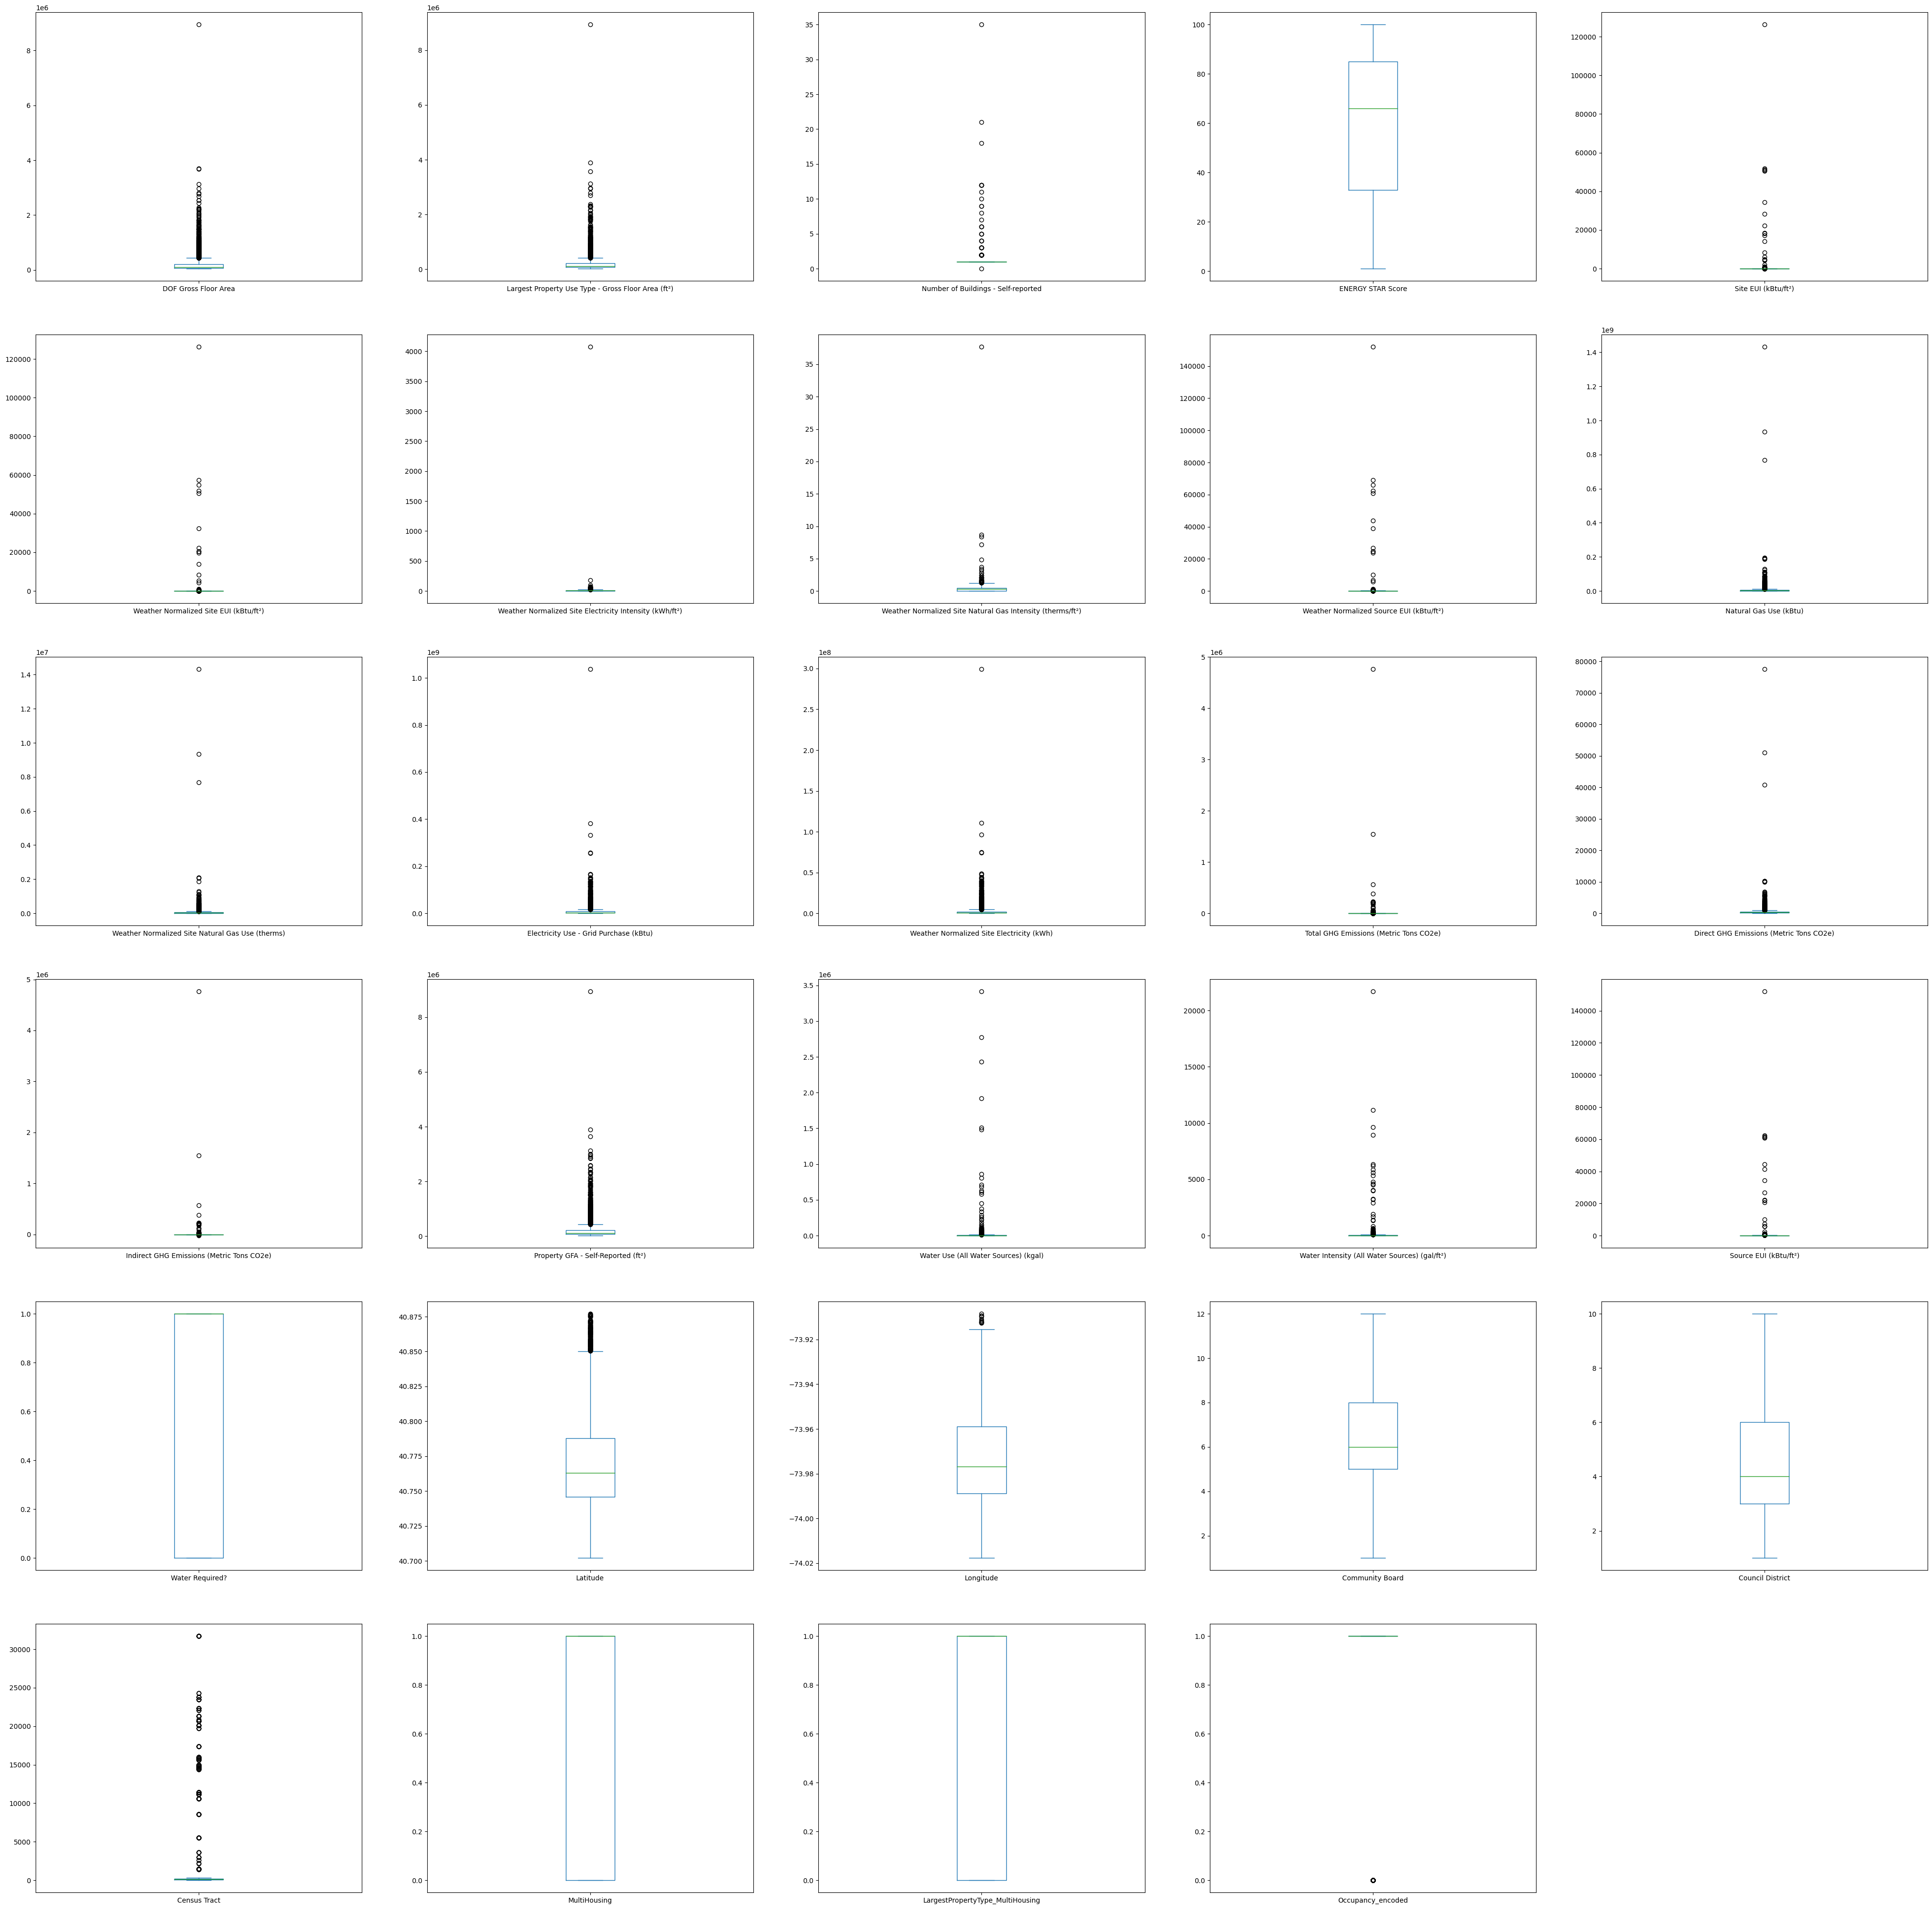

In [44]:
Manhattan_data.plot(kind = "box", subplots =True, layout = (6,5), figsize = (50,50) )

In [45]:
Manhattan_data.describe() # doubt with mean = 0 at some places

,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Number of Buildings - Self-reported,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Water Required?,Latitude,Longitude,Community Board,Council District,Census Tract,MultiHousing,LargestPropertyType_MultiHousing,Occupancy_encoded
count,4.086000e+03,4.086000e+03,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4.086000e+03,4.086000e+03,4.086000e+03,4.086000e+03,4.086000e+03,4086.000000,4.086000e+03,4.086000e+03,4.086000e+03,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.00000,4086.000000,4086.000000
mean,2.153934e+05,2.056683e+05,1.061429,58.666667,209.425135,205.486050,10.362310,0.340700,307.694200,5.938356e+06,6.142750e+04,8.824054e+06,2.524091e+06,3.719815e+03,442.256902,3.277668e+03,2.156175e+05,1.004157e+04,59.225984,313.845154,0.596427,40.769928,-73.973701,6.353647,4.626040,1886.859276,0.66373,0.664709,0.907000
std,3.239960e+05,3.137388e+05,0.845983,30.895607,2714.360607,2728.591952,64.034584,0.703191,3343.811857,3.123069e+07,3.136249e+05,2.467815e+07,7.122146e+06,7.967637e+04,1703.738546,7.967031e+04,3.279613e+05,9.612505e+04,512.691491,3329.112536,0.490674,0.036821,0.021226,2.892864,2.455807,5099.049866,0.47249,0.472150,0.290469
min,5.002800e+04,1.680300e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-2.313430e+04,1.680300e+04,0.000000e+00,0.000000,0.000000,0.000000,40.702112,-74.017656,1.000000,1.000000,6.000000,0.00000,0.000000,0.000000
25%,7.053975e+04,7.071100e+04,1.000000,33.000000,62.100000,66.800000,4.800000,0.000000,114.000000,5.360068e+05,6.081875e+03,1.520062e+06,4.554651e+05,4.099000e+02,102.200000,1.425000e+02,7.281175e+04,0.000000e+00,0.000000,106.625000,0.000000,40.745945,-73.988858,5.000000,3.000000,84.000000,0.00000,0.000000,1.000000
50%,1.139860e+05,1.112950e+05,1.000000,66.000000,76.900000,80.600000,7.300000,0.300000,143.400000,2.692459e+06,2.825930e+04,3.192810e+06,9.257362e+05,6.634500e+02,263.400000,3.160500e+02,1.154745e+05,2.500850e+03,23.605000,139.400000,1.000000,40.763012,-73.976782,6.000000,4.000000,132.000000,1.00000,1.000000,1.000000
75%,2.172632e+05,2.090380e+05,1.000000,85.000000,97.300000,98.600000,12.300000,0.500000,182.800000,5.147511e+06,5.341625e+04,7.577658e+06,2.112029e+06,1.336925e+03,456.025000,8.255750e+02,2.174208e+05,5.747000e+03,43.455000,185.475000,1.000000,40.787750,-73.958853,8.000000,6.000000,222.000000,1.00000,1.000000,1.000000
max,8.942176e+06,8.942176e+06,35.000000,100.000000,126307.400000,126307.400000,4074.900000,37.700000,152001.300000,1.432251e+09,1.432251e+07,1.037256e+09,2.992602e+08,4.764456e+06,77564.100000,4.764375e+06,8.942176e+06,3.414616e+06,21689.360000,152001.300000,1.000000,40.877059,-73.908500,12.000000,10.000000,31704.000000,1.00000,1.000000,1.000000


In [46]:
x = Manhattan_data.drop('ENERGY STAR Score', axis =1)
y = Manhattan_data['ENERGY STAR Score']

In [47]:
#Oultier Removal for DOF column
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1
LL = Q1 - 1.5*IQR
UL = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(UL)
print(LL) 



#Outlier_df = Manhattan_data[(Manhattan_data['DOF Gross Floor Area'] < lb) | (Manhattan_data['DOF Gross Floor Area'] > ub)]
#transformed_data, lambda_value = boxcox(Manhattan_data['DOF Gross Floor Area'])
#Manhattan_data['DOF Gross Floor Area'] = transformed_data

#Outlier_df.describe()

DOF Gross Floor Area                                          7.053975e+04
Largest Property Use Type - Gross Floor Area (ft²)            7.071100e+04
Number of Buildings - Self-reported                           1.000000e+00
Site EUI (kBtu/ft²)                                           6.210000e+01
Weather Normalized Site EUI (kBtu/ft²)                        6.680000e+01
Weather Normalized Site Electricity Intensity (kWh/ft²)       4.800000e+00
Weather Normalized Site Natural Gas Intensity (therms/ft²)    0.000000e+00
Weather Normalized Source EUI (kBtu/ft²)                      1.140000e+02
Natural Gas Use (kBtu)                                        5.360068e+05
Weather Normalized Site Natural Gas Use (therms)              6.081875e+03
Electricity Use - Grid Purchase (kBtu)                        1.520062e+06
Weather Normalized Site Electricity (kWh)                     4.554651e+05
Total GHG Emissions (Metric Tons CO2e)                        4.099000e+02
Direct GHG Emissions (Met

In [48]:
#(len(Outlier_df)/len(Manhattan_data))*100

((x > UL) | (x < LL)).sum()


DOF Gross Floor Area                                          439
Largest Property Use Type - Gross Floor Area (ft²)            429
Number of Buildings - Self-reported                            70
Site EUI (kBtu/ft²)                                           243
Weather Normalized Site EUI (kBtu/ft²)                        311
Weather Normalized Site Electricity Intensity (kWh/ft²)       128
Weather Normalized Site Natural Gas Intensity (therms/ft²)     54
Weather Normalized Source EUI (kBtu/ft²)                      220
Natural Gas Use (kBtu)                                        352
Weather Normalized Site Natural Gas Use (therms)              348
Electricity Use - Grid Purchase (kBtu)                        471
Weather Normalized Site Electricity (kWh)                     474
Total GHG Emissions (Metric Tons CO2e)                        471
Direct GHG Emissions (Metric Tons CO2e)                       312
Indirect GHG Emissions (Metric Tons CO2e)                     508
Property G

In [49]:
x[((x > UL) | (x < LL))] = np.nan

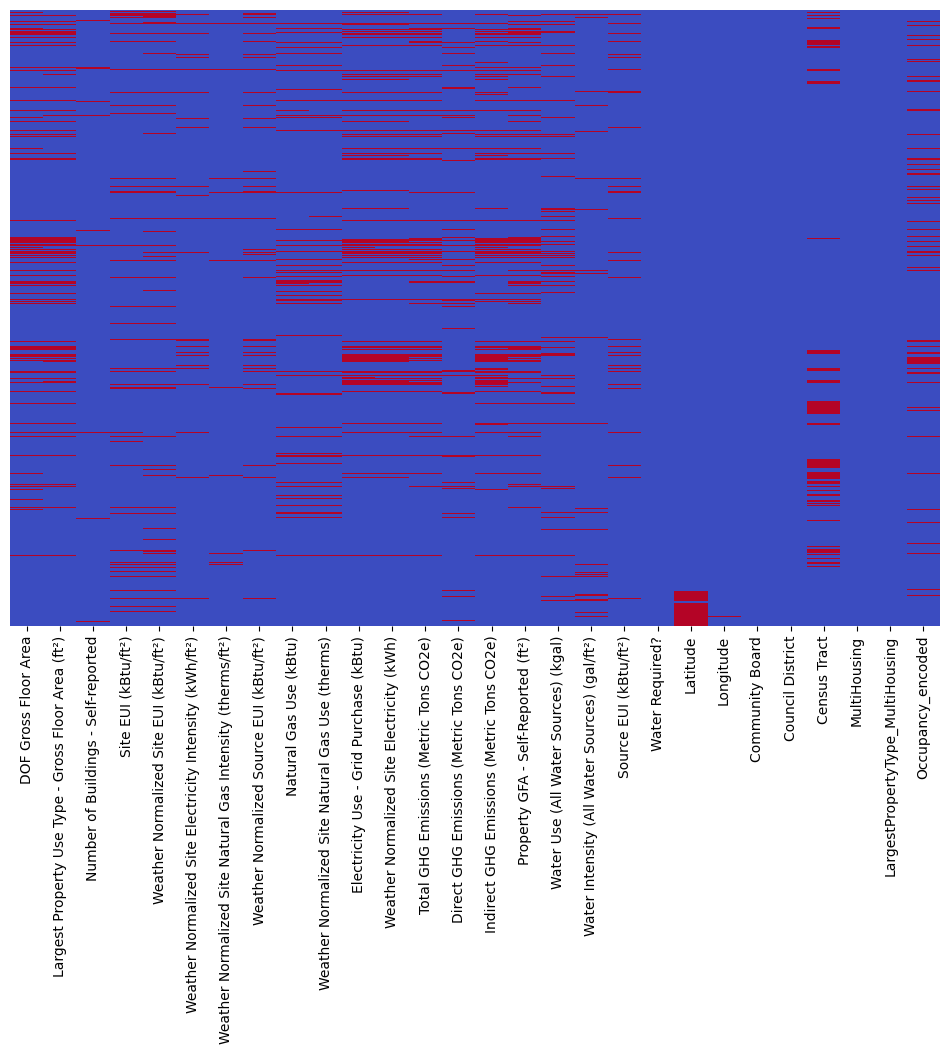

In [50]:
plt.figure(figsize=(12,8))
sns.heatmap(x.isnull(), cbar=False, cmap='coolwarm', yticklabels=False)
plt.show()

In [51]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 1 to 5470
Data columns (total 28 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   DOF Gross Floor Area                                        3647 non-null   float64
 1   Largest Property Use Type - Gross Floor Area (ft²)          3657 non-null   float64
 2   Number of Buildings - Self-reported                         4016 non-null   float64
 3   Site EUI (kBtu/ft²)                                         3843 non-null   float64
 4   Weather Normalized Site EUI (kBtu/ft²)                      3775 non-null   float64
 5   Weather Normalized Site Electricity Intensity (kWh/ft²)     3958 non-null   float64
 6   Weather Normalized Site Natural Gas Intensity (therms/ft²)  4032 non-null   float64
 7   Weather Normalized Source EUI (kBtu/ft²)                    3866 non-null   float64
 8 

In [52]:
x.head()

,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Number of Buildings - Self-reported,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Water Required?,Latitude,Longitude,Community Board,Council District,Census Tract,MultiHousing,LargestPropertyType_MultiHousing,Occupancy_encoded
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,40.841402,-73.942568,12.0,10.0,251.0,0,0,1.0
5,NaN,NaN,NaN,NaN,NaN,8.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,40.761395,-73.957726,8.0,5.0,116.0,0,0,1.0
18,179130.0,321464.0,NaN,76.2,79.9,3.5,0.0,106.2,880200.0,8906.3,3968641.7,1121931.8,1893.4,NaN,368.3,321464.0,5915.6,18.4,103.3,1,NaN,-73.934962,12.0,10.0,281.0,1,1,1.0
19,179130.0,204720.0,1.0,75.7,79.0,4.0,0.0,109.1,553439.4,5604.4,2886852.2,820016.2,1204.4,936.5,267.9,204720.0,0.0,0.0,106.6,1,NaN,-73.934962,12.0,10.0,281.0,1,1,1.0
20,102150.0,116744.0,1.0,77.1,82.7,2.6,0.0,102.8,326760.6,3301.9,1081789.4,308074.6,689.0,588.6,100.4,116744.0,0.0,0.0,97.7,1,NaN,-73.934734,12.0,10.0,281.0,1,1,1.0


In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [74]:
#new_data = pd.concat([scaled_x, y], axis=1)
#scaled_x.head()

,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Number of Buildings - Self-reported,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Water Required?,Latitude,Longitude,Community Board,Council District,Census Tract,MultiHousing,LargestPropertyType_MultiHousing,Occupancy_encoded
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.884768,-0.981164,NaN,-1.215675,2.493950,1.490605,1.952060,2.188534,1.704270,-1.404920,-1.408006,0.0
1,NaN,NaN,NaN,NaN,NaN,-0.046228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.884768,-0.981164,NaN,-1.215675,-0.111195,0.768792,0.569178,0.152294,-0.207480,-1.404920,-1.408006,0.0
2,0.504096,2.303714,NaN,-0.066110,-0.062107,-1.039504,-1.109946,-0.811570,-0.741097,-0.764772,-0.001314,-0.006086,2.003174,NaN,-0.107148,2.154987,0.865575,-0.273830,-0.736592,0.822588,NaN,1.852798,1.952060,2.188534,2.129103,0.711784,0.710224,0.0
3,0.504096,0.897990,0.0,-0.085385,-0.100794,-0.936038,-1.109946,-0.752322,-0.862930,-0.883761,-0.305891,-0.314563,0.768905,2.982421,-0.361803,0.806068,-0.884768,-0.981164,-0.675967,0.822588,NaN,1.852798,1.952060,2.188534,2.129103,0.711784,0.710224,0.0
4,-0.362620,-0.161336,0.0,-0.031415,0.058252,-1.225744,-1.109946,-0.881034,-0.947448,-0.966735,-0.814106,-0.837630,-0.154379,1.425510,-0.786652,-0.210450,-0.884768,-0.981164,-0.839470,0.822588,NaN,1.863655,1.952060,2.188534,2.129103,0.711784,0.710224,0.0


In [81]:
new_data.shape

(5196, 29)

In [89]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10)
new_data_imputed = pd.DataFrame(imputer.fit_transform(scaled_x), columns=scaled_x.columns)

In [90]:
new_data_imputed.isnull().sum()

DOF Gross Floor Area                                          0
Largest Property Use Type - Gross Floor Area (ft²)            0
Number of Buildings - Self-reported                           0
Site EUI (kBtu/ft²)                                           0
Weather Normalized Site EUI (kBtu/ft²)                        0
Weather Normalized Site Electricity Intensity (kWh/ft²)       0
Weather Normalized Site Natural Gas Intensity (therms/ft²)    0
Weather Normalized Source EUI (kBtu/ft²)                      0
Natural Gas Use (kBtu)                                        0
Weather Normalized Site Natural Gas Use (therms)              0
Electricity Use - Grid Purchase (kBtu)                        0
Weather Normalized Site Electricity (kWh)                     0
Total GHG Emissions (Metric Tons CO2e)                        0
Direct GHG Emissions (Metric Tons CO2e)                       0
Indirect GHG Emissions (Metric Tons CO2e)                     0
Property GFA - Self-Reported (ft²)      

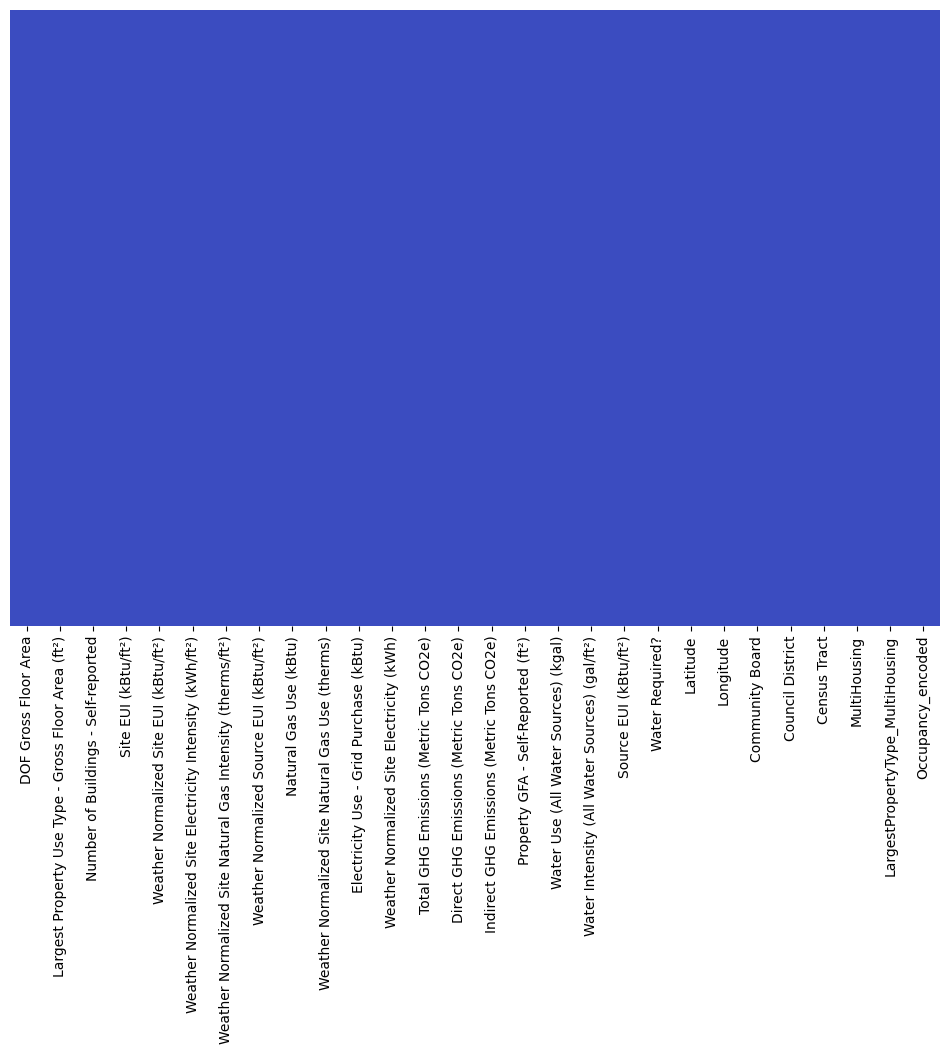

In [91]:
plt.figure(figsize=(12,8))
sns.heatmap(new_data_imputed.isnull(), cbar=False, cmap='coolwarm', yticklabels=False)
plt.show()

# Borugh 2 - Brooklyn

In [138]:
Bronx_data.head()

,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,Latitude,Longitude,Community Board,Council District,Census Tract
151,2059330425,2-05933-0425,2098646;2098647;2098644;2102084,Bronx,192939.0,Residence Hall/Dormitory,Residence Hall/Dormitory,Residence Hall/Dormitory,200261.0,1924,1,100,Whole Building,NaN,59.0,93.6,99.2,9.9,0.5,173.9,8996806.0,97764.0,6744127.4,1976590.4,1325.9,700.1,625.9,200261,NaN,NaN,168.0,05/01/2017 11:28:51 AM,No,40.911797,-73.907008,8.0,11.0,309.0
174,2051410810,2-05141-0810,2000000,Bronx,540388.0,Bank Branch,Bank Branch,Bank Branch,3190.0,2004,1,100,Whole Building,NaN,3.0,279.0,295.1,45.2,1.4,632.1,386555.7,4495.6,503490.5,144153.9,67.3,20.5,46.7,3190,NaN,NaN,622.8,05/01/2017 04:42:29 PM,No,40.869429,-73.825737,10.0,12.0,46201.0
176,2051410810,2-05141-0810,2121320,Bronx,540388.0,Bank Branch,Bank Branch,Bank Branch,3800.0,2007,1,100,Whole Building,NaN,45.0,124.1,132.0,23.8,0.5,308.2,163200.7,1931.0,308465.1,90405.9,37.3,8.7,28.6,3800,NaN,NaN,300.0,05/01/2017 04:42:29 PM,No,40.869429,-73.825737,10.0,12.0,46201.0
246,2057810992,2-05781-0992,2124454,Bronx,184087.0,K-12 School,"K-12 School, Parking, Swimming Pool",K-12 School,322505.0,1928,14,100,Whole Building,NaN,49.0,75.9,81.1,9.1,0.1,148.2,2904463.4,31764.9,9982738.4,2925772.9,1940.3,1013.9,926.4,322505,NaN,NaN,142.9,07/28/2017 09:41:04 AM,Yes,40.890431,-73.905757,8.0,11.0,335.0
288,2037160001;2037170001,2-03716-0001;2-03717-0001,2023511;2023553,Bronx,NaN,Multifamily Housing,Multifamily Housing,Multifamily Housing,249600.0,1960,2,95,Whole Building,NaN,32.0,98.4,105.8,5.5,0.0,147.4,1022440.0,10333.1,4924195.0,1385187.3,1891.7,1434.8,457.0,249600,NaN,NaN,141.5,05/01/2017 10:21:40 PM,Yes,NaN,NaN,NaN,NaN,NaN


In [105]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [114]:
len(new_data_imputed.columns)

28

In [115]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [116]:
#Logit = LogisticRegression()
#rforest = RandomForestClassifier(criterion='entropy')
#gboost = GradientBoostingClassifier()
lm = LinearRegression()


In [130]:
selector = RFE(estimator= lm, n_features_to_select=8, step=1)

In [131]:
selector = selector.fit(x_train, y_train)

In [132]:
selector.ranking_

array([ 1,  3, 20,  1, 16,  1,  8,  9, 12, 11,  4,  5, 19, 15,  1,  1, 17,
       14,  1, 18,  1, 13,  7,  6,  2, 10,  1, 21])

In [133]:
y_pred_train = selector.predict(x_train)
y_pred_test = selector.predict(x_test)

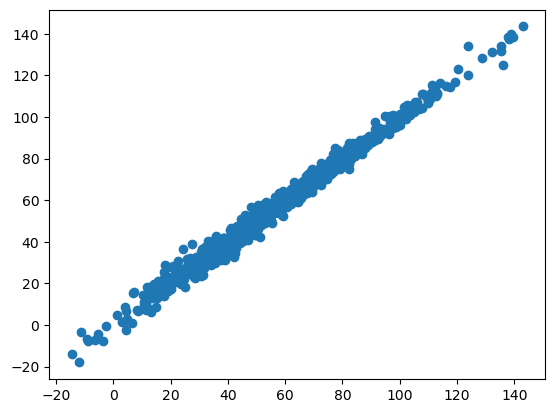

In [134]:
plt.scatter(y_test,y_pred_test)

In [135]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.0
MSE: 0.0
RMSE: 0.0


/var/folders/s6/nl9myj9d5_123z_8p1d0f5hh0000gn/T/ipykernel_7851/2398743776.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( resi , bins = 60);


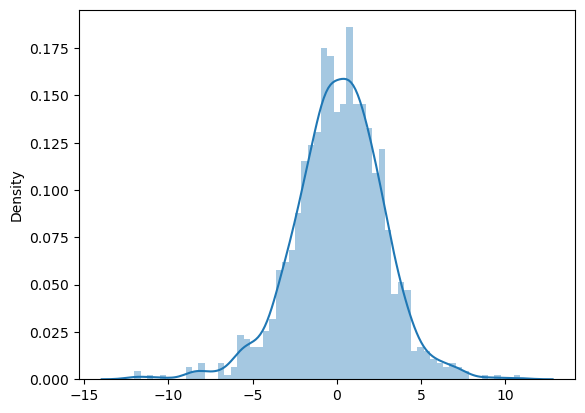

In [136]:
resi = y_test - y_pred_test
sns.distplot( resi , bins = 60);

In [137]:
from sklearn.metrics import r2_score
r_2 = r2_score(y_test, y_pred_test)
r_2


0.9877617699533828

In [95]:
#X = new_data_imputed


In [96]:
#from sklearn.model_selection import train_test_split

#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [97]:
scaled_x.isnull().sum()

DOF Gross Floor Area                                          439
Largest Property Use Type - Gross Floor Area (ft²)            429
Number of Buildings - Self-reported                            70
Site EUI (kBtu/ft²)                                           243
Weather Normalized Site EUI (kBtu/ft²)                        311
Weather Normalized Site Electricity Intensity (kWh/ft²)       128
Weather Normalized Site Natural Gas Intensity (therms/ft²)     54
Weather Normalized Source EUI (kBtu/ft²)                      220
Natural Gas Use (kBtu)                                        352
Weather Normalized Site Natural Gas Use (therms)              348
Electricity Use - Grid Purchase (kBtu)                        471
Weather Normalized Site Electricity (kWh)                     474
Total GHG Emissions (Metric Tons CO2e)                        471
Direct GHG Emissions (Metric Tons CO2e)                       312
Indirect GHG Emissions (Metric Tons CO2e)                     508
Property G

In [98]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [99]:
predictions = lm.predict(x_test)

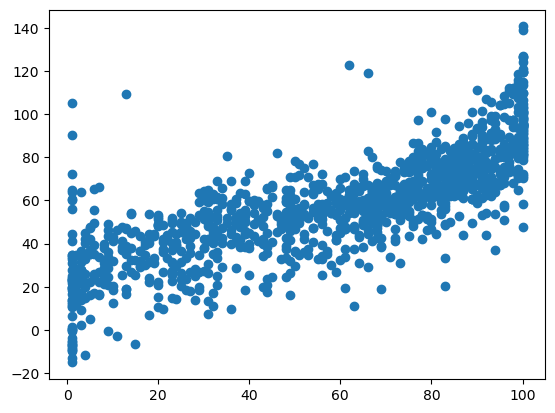

In [100]:
plt.scatter(y_test,predictions)

In [101]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 15.16796238588559
MSE: 368.8534253417763
RMSE: 19.20555714739295


/var/folders/s6/nl9myj9d5_123z_8p1d0f5hh0000gn/T/ipykernel_7851/3298165094.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( resi , bins = 60);


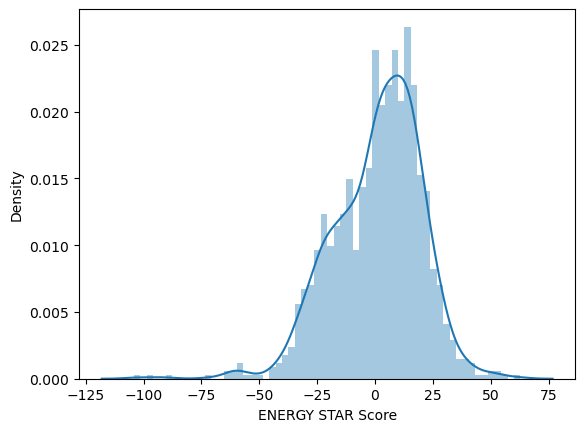

In [102]:
resi = y_test - predictions
sns.distplot( resi , bins = 60);

In [103]:
from sklearn.metrics import r2_score
r_2 = r2_score(y_test, predictions)
r_2


0.6164973360519483

In [104]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df


,Coefficient
DOF Gross Floor Area,-2.200315e+00
Largest Property Use Type - Gross Floor Area (ft²),-1.764323e+00
Number of Buildings - Self-reported,-1.598721e-14
Site EUI (kBtu/ft²),-8.835553e+00
Weather Normalized Site EUI (kBtu/ft²),-4.469764e-01
Weather Normalized Site Electricity Intensity (kWh/ft²),-6.913198e+00
Weather Normalized Site Natural Gas Intensity (therms/ft²),-2.794945e+00
Weather Normalized Source EUI (kBtu/ft²),-9.460210e-01
Natural Gas Use (kBtu),-3.219828e+00
Weather Normalized Site Natural Gas Use (therms),3.537748e+00
